# Working with Hierachies in Atoti

In this notebook, we'll show you how to work with hierarchies when using the Atoti Python API. In particular, we'll show you how to implement the following properties and functions for [hierarchies](https://docs.atoti.io/latest/api/atoti.Hierarchy.html):

* [`dimension`](#Hierarchy.dimension): Name of the dimension of the hierarchy.
* [`dimension_default`](#Hierarchy.dimension_default): Whether the hierarchy is the default in its dimension or not.
* [`isin`](#Hierarchy.isin()): Return a condition to check that the hierarchy is on one of the given members.
* `levels`: Levels of the hierarchy.
* `name`: Name of the hierarchy.
* `slicing`: Whether the hierarchy is slicing or not.
* `virtual`: Whether the hierarchy is virtual or not.
* `visible`: Whether the hierarchy is visible or not.

💡 **Note:** Check out the Atoti Server Docs for more conceptual information on [dimensions and hierarchies](https://docs.activeviam.com/products/atoti/server/6.0.7/docs/concepts/dimensions_and_hierarchies/) and on the different [types of hierarchies](https://docs.activeviam.com/products/atoti/server/6.0.7/docs/concepts/dimensions_and_hierarchies/#different-types-of-hierarchies) that Atoti supports.

<div style="text-align: center;" ><a href="https://www.atoti.io/?utm_source=gallery&utm_content=hierarchies" target="_blank" rel="noopener noreferrer"><img src="https://data.atoti.io/notebooks/banners/Discover-Atoti-now.png" alt="Try Atoti"></a></div>

## Import Libraries

First things first, let's import our libraries.

In [1]:
import atoti as tt
import pandas

## Instantiate Atoti Server and Link UI

Next, we'll spin up the Atoti server and link the session to our web-based Atoti UI.

💡 **Note**: https://docs.atoti.io/latest/api/atoti.Session.html#atoti.Session

In [2]:
session = tt.Session(
    user_content_storage="./content",
    port=9092,
    java_options=["-Xms1G", "-Xmx10G"],
)
session.link

http://localhost:9092

_Note_: This is the session's local URL: it may not be reachable if Atoti is running on another machine.

## Load CSVs from S3 Into Atoti Tables

From here on, we'll be loading the following CSVs from S3 into Atoti Tables.

* [Orders](#Orders)
* [Products](#Products)
* [Shippers](#Shippers)
* [Customers](#Customers)
* [Employees](#Employees)

💡 **Note**: We should be mindful of the (numerical) columns that we intend to use as hierarchies instead of measures (e.g. an Order ID does not need to be aggregated!). For this reason, we can explicitly set specific Atoti Table columns as desired data types when loading data into Atoti Tables. See https://docs.atoti.io/latest/api/atoti.Session.read_csv.html#atoti.Session.read_csv for more info.

### Orders

In [3]:
orders = session.read_csv(
    "s3://data.atoti.io/notebooks/hierarchies/data/Orders.csv",
    types={
        "OrderId": tt.STRING,
        "ProductId": tt.STRING,
        "EmployeeId": tt.STRING,
        "CustomerId": tt.STRING,
    },
    keys=["OrderId"],
)
orders.head()

,OrderDate,QuantitySold,SellingPricePerUnit,ShipperName,ProductId,EmployeeId,CustomerId
OrderId,,,,,,,
13,18/2/2019,233,32.01,Federal Shipping,1358,18551,c4859
27,18/2/2019,749,21.96,Rapid Post,1514,26584,c4747
41,18/2/2019,454,11.73,Freight United,773,98635,c2675
55,18/2/2019,2,32.18,Speedy Express,1137,18336,c1275
69,18/2/2019,672,56.04,Speedy Express,591,26584,c3067


### Products

In [4]:
products = session.read_csv(
    "s3://data.atoti.io/notebooks/hierarchies/data/Products.csv",
    types={
        "ProductId": tt.STRING,
        "ProductName": tt.STRING,
        "ProductCategory": tt.STRING,
        "Supplier": tt.STRING,
        "PurchasingPricePerUnit": tt.DOUBLE,
    },
    keys=["ProductId"],
)
products.head()

,ProductName,ProductCategory,Supplier,PurchasingPricePerUnit
ProductId,,,,
695,Gorgonzola Telino,Dairy Products,Formaggi Fortini s.r.l.,7.2
877,Mascarpone Fabioli,Dairy Products,Formaggi Fortini s.r.l.,18.43
1059,Ipoh Coffee,Beverages,Leka Trading,31.05
1241,Spegesild,Seafood,Lyngbysild,6.48
1423,Gumbär Gummibärchen,Confections,Heli Süßwaren GmbH & Co. KG,16.81


### Shippers

In [5]:
shippers = session.read_csv(
    "s3://data.atoti.io/notebooks/hierarchies/data/Shippers.csv",
    types={
        "ShipperName": tt.STRING,
        "Contact": tt.STRING,
    },
)
shippers.head()

,ShipperName,Contact
0,Freight United,Geoff Matthews
1,Federal Shipping,Liz Welds
2,Rapid Post,Payal Shah
3,The Transporter,Funmi Odunga
4,United Package,Junqi Huang


### Customers

In [6]:
customers = session.read_csv(
    "s3://data.atoti.io/notebooks/hierarchies/data/Customers.csv",
    types={
        "CustomerId": tt.STRING,
        "CompanyName": tt.STRING,
        "Region": tt.STRING,
        "Country": tt.STRING,
        "Address": tt.STRING,
        "City": tt.STRING,
        "PostCode": tt.STRING,
        "Phone": tt.STRING,
    },
    keys=["CustomerId"],
)
customers.head()

,CompanyName,Address,City,PostalCode,Region,Country,Subregion,Phone,PostCode
CustomerId,,,,,,,,,
c3571,Bon app',"12, rue des Bouchers",Marseille,13008,Europe,France,Western Europe,91.24.45.40,N/A
c4075,Drachenblut Delikatessen,Walserweg 21,Aachen,52066,Europe,Germany,Western Europe,0241-039123,N/A
c4243,Galería del gastrónomo,"Rambla de Cataluña, 23",Barcelona,8022,Europe,Spain,Southern Europe,(93) 203 4560,N/A
c5083,Laughing Bacchus Wine Cellars,1900 Oak St.,Vancouver,V3F 2K1,Northern America,Canada,North America,(604) 555-3392,N/A
c5027,Lazy K Kountry Store,12 Orchestra Terrace,Walla Walla,99362,Northern America,United States,North America,(509) 555-7969,N/A


### Employees

In [7]:
employees = session.read_csv(
    "s3://data.atoti.io/notebooks/hierarchies/data/Employees.csv",
    types={
        "EmployeeId": tt.STRING,
        "EmployeeName": tt.STRING,
        "EmployeeCountry": tt.STRING,
        "EmployeeCity": tt.STRING,
    },
    keys=["EmployeeId"],
)
employees.head()

,EmployeeName,EmployeeZone,EmployeeCountry,EmployeeCity
EmployeeId,,,,
63528,Sean Tan,ASIA,SG,Singapore
98635,Shannon Lim,ASIA,SG,Singapore
12344,Paul Henry,EMEA,FR,Paris
12695,Louis Philippe,EMEA,FR,Lyon
18336,Steven Buchanan,EMEA,UK,London


## Join Tables and Create Cube

Now, that our data is loaded into our Atoti Tables and in the format that we want, we should join our tables together on common keys to extend attributes from other entity relationships, and create our Atoti cube.

In [8]:
# Join tables
orders.join(products, orders["ProductId"] == products["ProductId"])
orders.join(employees, orders["EmployeeId"] == employees["EmployeeId"])
orders.join(customers, orders["CustomerId"] == customers["CustomerId"])
orders.join(shippers, orders["ShipperName"] == shippers["ShipperName"])

In [9]:
# Create Cube from Atoti Table object
cube = session.create_cube(orders)

## Analyze the Atoti Cube

Now that the data has been loaded into the cube, we'll want to examine the data model of the cube to confirm that the columns and data types match up to what we expect. In addition, we can view the hierarchies, levels, and measures for our cube by assigning them to variables.

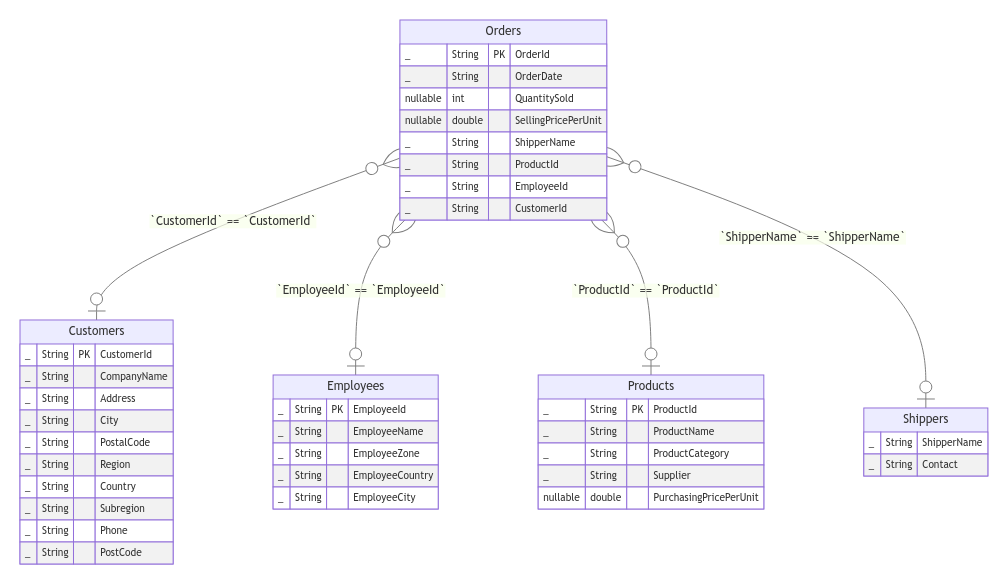

In [10]:
# View the schema of the data model
session.tables.schema

In [11]:
# Set variables for hierarchies, levels, and measures
h, l, m = cube.hierarchies, cube.levels, cube.measures

## Viewing Hierarchies

Because this walk through will mainly be focusing on hierarchies, let's view the hierarchies for the data model by printing the list of hierarchies based on the variable that we assigned.

We can see that each hierarchy is categorized under dimensions, and each hierarchy has it's own set of levels (starting with a 0-based index).

💡 **Note**: Hierarchies can have [multiple levels](https://docs.atoti.io/latest/getting_started/tutorial/tutorial.html#Multilevel-hierarchies), which we will show later in this notebook.

In [12]:
h

{('Products', 'Supplier'): <atoti.hierarchy.Hierarchy object at 0x11a2038e0>, ('Orders', 'OrderDate'): <atoti.hierarchy.Hierarchy object at 0x11a203a30>, ('Orders', 'ProductId'): <atoti.hierarchy.Hierarchy object at 0x11a203b20>, ('Products', 'ProductName'): <atoti.hierarchy.Hierarchy object at 0x11a203c10>, ('Customers', 'Phone'): <atoti.hierarchy.Hierarchy object at 0x11a203d00>, ('Customers', 'Address'): <atoti.hierarchy.Hierarchy object at 0x11a203df0>, ('Customers', 'Region'): <atoti.hierarchy.Hierarchy object at 0x11a0ef250>, ('Shippers', 'Contact'): <atoti.hierarchy.Hierarchy object at 0x11a0ef430>, ('Orders', 'EmployeeId'): <atoti.hierarchy.Hierarchy object at 0x11a1819f0>, ('Customers', 'PostCode'): <atoti.hierarchy.Hierarchy object at 0x11a183580>, ('Employees', 'EmployeeCountry'): <atoti.hierarchy.Hierarchy object at 0x11a183550>, ('Products', 'ProductCategory'): <atoti.hierarchy.Hierarchy object at 0x11a1e4fd0>, ('Customers', 'PostalCode'): <atoti.hierarchy.Hierarchy object at 0x11a1e7df0>, ('Customers', 'Subregion'): <atoti.hierarchy.Hierarchy object at 0x11a1e7790>, ('Orders', 'CustomerId'): <atoti.hierarchy.Hierarchy object at 0x11a1e4730>, ('Employees', 'EmployeeCity'): <atoti.hierarchy.Hierarchy object at 0x11a0946a0>, ('Customers', 'Country'): <atoti.hierarchy.Hierarchy object at 0x11a095090>, ('Orders', 'OrderId'): <atoti.hierarchy.Hierarchy object at 0x11a203700>, ('Customers', 'CompanyName'): <atoti.hierarchy.Hierarchy object at 0x11a2035e0>, ('Orders', 'ShipperName'): <atoti.hierarchy.Hierarchy object at 0x11a203310>, ('Employees', 'EmployeeName'): <atoti.hierarchy.Hierarchy object at 0x11a202fe0>, ('Employees', 'EmployeeZone'): <atoti.hierarchy.Hierarchy object at 0x11a2030a0>, ('Customers', 'City'): <atoti.hierarchy.Hierarchy object at 0x11a203010>}

## Using atoti.Hierarchy Properties and Functions

With our hierarchies listed, let's now walk through how to use the various `atoti.Hierarchy` properties and functions to interact with (and manipulate) our hierarchies in our data model.

We will categorize our hierarchy properties and functions by the following difficulties:

* [Basic](#Basic-Implementations)
* [Advanced](#Advanced-Implementations)

### Basic Implementations

These are the basic implementations and tips for working with hierarchies in the Atoti Python API.

#### `Hierarchy.dimension`

We can use the `dimension` property of a Hierarchy object to determine the parent dimension which it is categorized under. For example, we can call the `dimension` property of the `Address` hierarchy to determine that its parent dimension is `Customers`. 

In [13]:
h['Address'].dimension

'Customers'

#### `Hierarchy.dimension_default`

We can also call the `dimension_default` property of a Hierarchy object to determine if a specified hierarchy is the default hierarchy in its parent dimension.

In [14]:
h['Address'].dimension_default

False

The output of the `dimension_default` property for a Hierarchy should be either `True` or `False`. In this case, the `Address` hiearchy of the `Customers` dimension is **not** the default hierarchy for the `Customers` dimension.

So which hierarchy **is** the default hierarchy for the `Customers` dimension? We can create a simple `for` loop to test this. 

💡 **Note:** The `Orders` and `Customers` tables are joined by the common key: `CustomerId`. However, from an Atoti data model perspective, `CustomerId` is a hierarchy present under the base table or `Orders` dimension, and is no longer present as a (redundant) hierarchy under the `Customers` dimension. Therefore, when checking the `Customers` dimension for its default hierarchy, we must filter out the `CustomerId` out from the search criteria — otherwise we get a missing `KeyError`.

In [15]:
def check_default_hierarchy(hierachies, table):
    """Checks for the default hierarchy for an Atoti Table object."""    
    dimension = table.name
    for hierarchy in table.columns:
        if hierarchy != "CustomerId":
            print(f"h['{dimension}', '{hierarchy}'].dimension_default == {h[dimension, hierarchy].dimension_default}")

check_default_hierarchy(h, customers)

h['Customers', 'CompanyName'].dimension_default == False
h['Customers', 'Address'].dimension_default == False
h['Customers', 'City'].dimension_default == False
h['Customers', 'PostalCode'].dimension_default == True
h['Customers', 'Region'].dimension_default == False
h['Customers', 'Country'].dimension_default == False
h['Customers', 'Subregion'].dimension_default == False
h['Customers', 'Phone'].dimension_default == False
h['Customers', 'PostCode'].dimension_default == False


We can see that the default hierarchy for the `Customers` dimension is actually `PostalCode`. If we set another hierarchy under the `Customers` dimension as the default hierarchy, it would look like this:

In [16]:
h['Address'].dimension_default = True

Then, if we re-use the `check_default_hierarchy` function that we defined previously, we can see that the default hierarchy for the `Customers` dimension has indeed been updated.

In [17]:
check_default_hierarchy(h, customers)

h['Customers', 'CompanyName'].dimension_default == False
h['Customers', 'Address'].dimension_default == True
h['Customers', 'City'].dimension_default == False
h['Customers', 'PostalCode'].dimension_default == False
h['Customers', 'Region'].dimension_default == False
h['Customers', 'Country'].dimension_default == False
h['Customers', 'Subregion'].dimension_default == False
h['Customers', 'Phone'].dimension_default == False
h['Customers', 'PostCode'].dimension_default == False


#### `Hierarchy.name`

The `name` property will output the name of the hierarchy like so:

In [18]:
h['Address'].name

'Address'

Though this is a bit redundant when we already know the name of the hierarchy. Therefore, using the `name` property may be more helpful when trying to execute a `for` loop to iterate over all hierarchies in an Atoti data model, where we may want the colloquial hierarchy name rather than the fully qualified one (with both the dimension and hierarchy listed).

In [19]:
for key in h.keys():
    print(key)

('Products', 'Supplier')
('Orders', 'OrderDate')
('Orders', 'ProductId')
('Products', 'ProductName')
('Customers', 'Phone')
('Customers', 'Address')
('Customers', 'Region')
('Shippers', 'Contact')
('Orders', 'EmployeeId')
('Customers', 'PostCode')
('Employees', 'EmployeeCountry')
('Products', 'ProductCategory')
('Customers', 'PostalCode')
('Customers', 'Subregion')
('Orders', 'CustomerId')
('Employees', 'EmployeeCity')
('Customers', 'Country')
('Orders', 'OrderId')
('Customers', 'CompanyName')
('Orders', 'ShipperName')
('Employees', 'EmployeeName')
('Employees', 'EmployeeZone')
('Customers', 'City')


In [20]:
for key in h.keys():
    print(h[key].name)

Supplier
OrderDate
ProductId
ProductName
Phone
Address
Region
Contact
EmployeeId
PostCode
EmployeeCountry
ProductCategory
PostalCode
Subregion
CustomerId
EmployeeCity
Country
OrderId
CompanyName
ShipperName
EmployeeName
EmployeeZone
City


#### `Hierarchy.visible`

The `visible` property will either display or hide a hierarchy from the list of available hierarchies when using Atoti in either the Atoti JupyterLab extension or the Atoti UI. For example, if we look at our data model, we can see the `CustomerId` hierarchy listed in the list of available hierarchies.

💡 **Note:** The `visible` property will **not** delete a hierarchy from an Atoti data model, it merely hides it as an available hierarchy in any of our UI interfaces. Programmatically, a hidden hierarchy can still be used.

<img src="images/hierarchies-visible-true.png" alt="drawing" width="225"/>

And correspondingly, if we use `session.widget` to select the `CustomerId` as our hierarchy and `contributors.COUNT` as our measure, we can see output as expected.

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
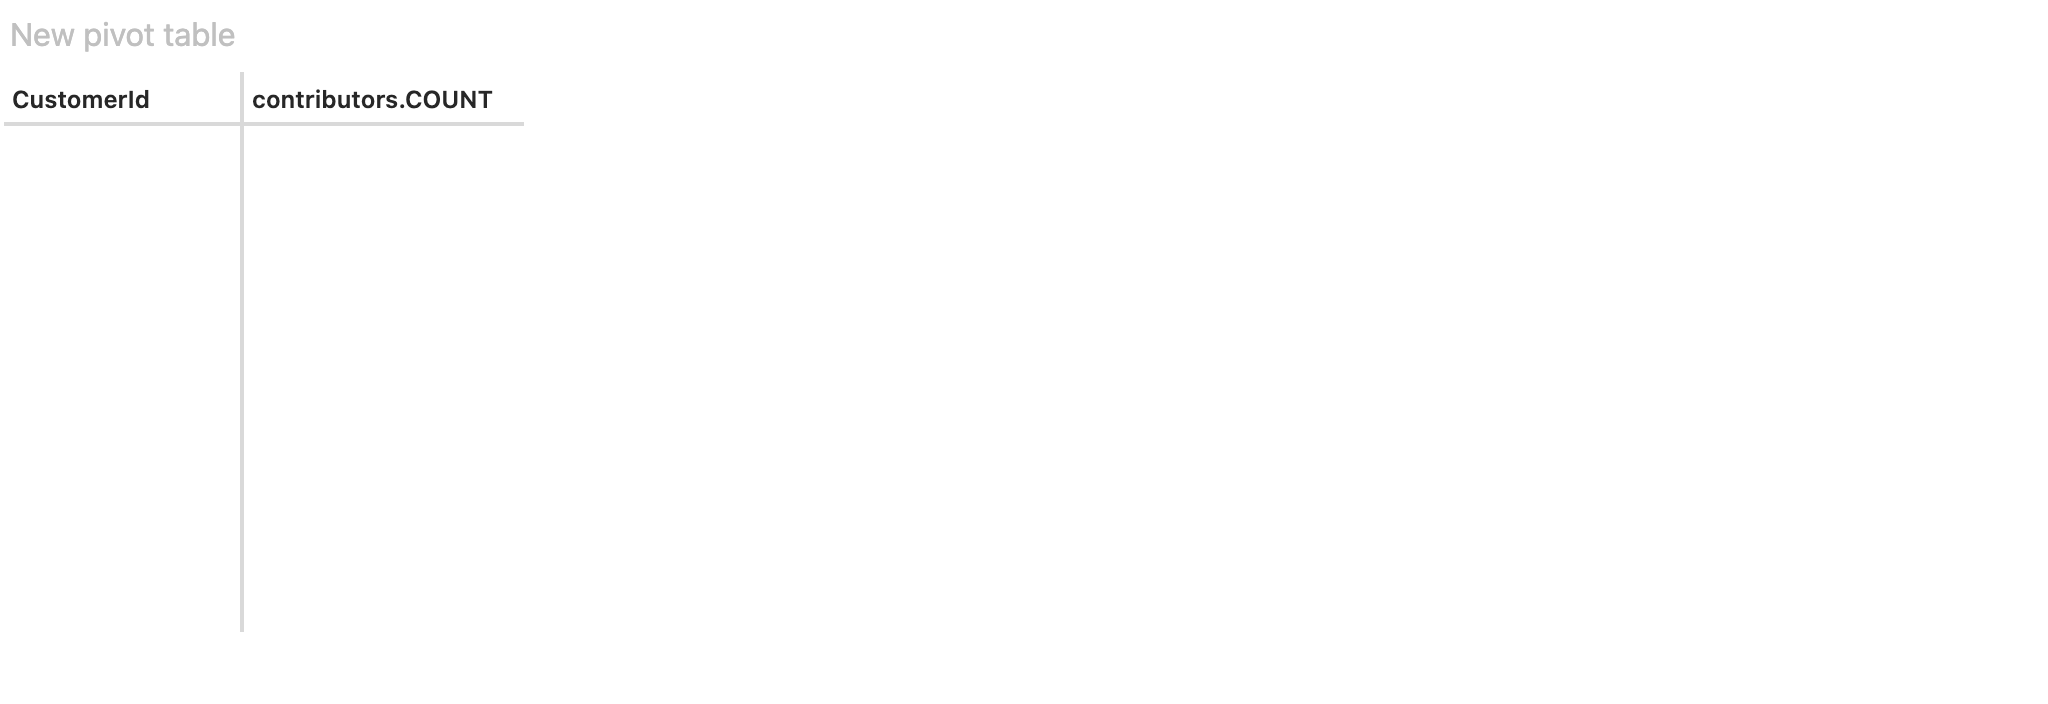

In [21]:
session.widget

However if we set the `visible` property of the `CustomerId` hierarchy to `False`, it will hide it from our list of available hierarchies as expected. Notice that the total number of hierarchies in the data model (`24`) does not change whether or not the `visible` property for a hierarchy is set to `True` or `False`.

In [22]:
h['CustomerId'].visible = False

<img src="images/hierarchies-visible-false.png" alt="drawing" width="225"/>

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
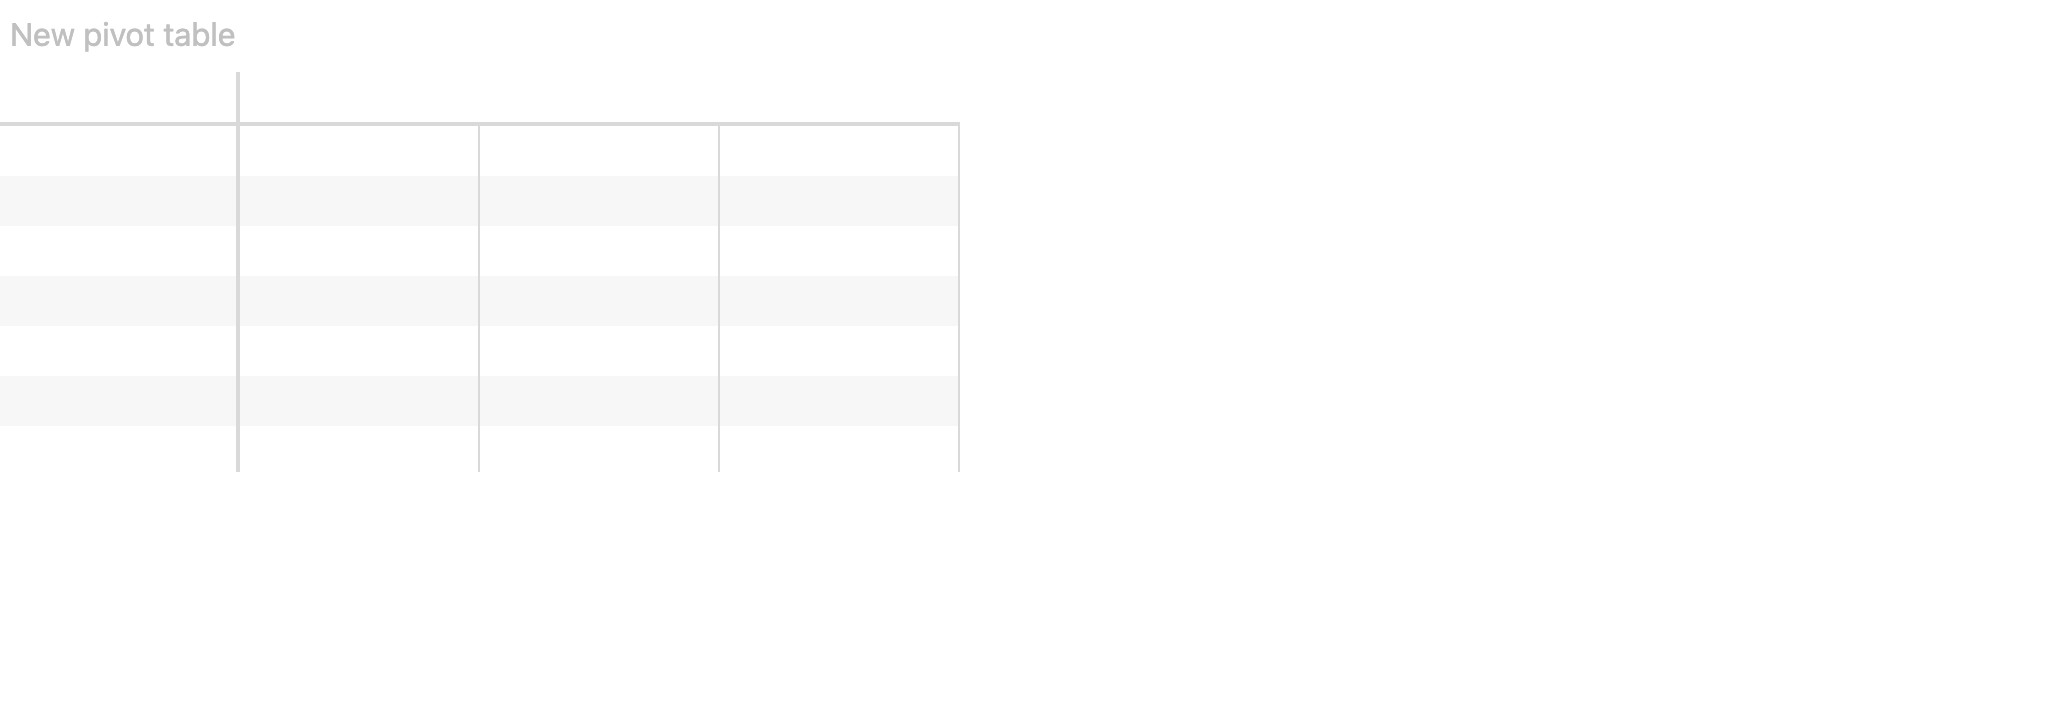

In [23]:
session.widget

In [24]:
h

{('Products', 'Supplier'): <atoti.hierarchy.Hierarchy object at 0x1421243a0>, ('Orders', 'OrderDate'): <atoti.hierarchy.Hierarchy object at 0x142125990>, ('Orders', 'ProductId'): <atoti.hierarchy.Hierarchy object at 0x1421240a0>, ('Products', 'ProductName'): <atoti.hierarchy.Hierarchy object at 0x142153370>, ('Customers', 'Phone'): <atoti.hierarchy.Hierarchy object at 0x142150400>, ('Customers', 'Address'): <atoti.hierarchy.Hierarchy object at 0x142152f50>, ('Customers', 'Region'): <atoti.hierarchy.Hierarchy object at 0x142152350>, ('Shippers', 'Contact'): <atoti.hierarchy.Hierarchy object at 0x142152b30>, ('Orders', 'EmployeeId'): <atoti.hierarchy.Hierarchy object at 0x142150a60>, ('Customers', 'PostCode'): <atoti.hierarchy.Hierarchy object at 0x142150640>, ('Employees', 'EmployeeCountry'): <atoti.hierarchy.Hierarchy object at 0x1421527d0>, ('Products', 'ProductCategory'): <atoti.hierarchy.Hierarchy object at 0x142151f60>, ('Customers', 'PostalCode'): <atoti.hierarchy.Hierarchy object at 0x1421526e0>, ('Customers', 'Subregion'): <atoti.hierarchy.Hierarchy object at 0x142151c00>, ('Orders', 'CustomerId'): <atoti.hierarchy.Hierarchy object at 0x142153670>, ('Employees', 'EmployeeCity'): <atoti.hierarchy.Hierarchy object at 0x142151b40>, ('Customers', 'Country'): <atoti.hierarchy.Hierarchy object at 0x142151630>, ('Orders', 'OrderId'): <atoti.hierarchy.Hierarchy object at 0x142153850>, ('Customers', 'CompanyName'): <atoti.hierarchy.Hierarchy object at 0x142153940>, ('Orders', 'ShipperName'): <atoti.hierarchy.Hierarchy object at 0x142153a30>, ('Employees', 'EmployeeName'): <atoti.hierarchy.Hierarchy object at 0x142153b20>, ('Employees', 'EmployeeZone'): <atoti.hierarchy.Hierarchy object at 0x142153c10>, ('Customers', 'City'): <atoti.hierarchy.Hierarchy object at 0x142153d00>}

### Advanced Implementations

#### `Hierarchy.levels`



In [25]:
l

In [26]:
address_levels = h['Address'].levels

for key in address_levels.keys():
    print(key)

Address


In [27]:
address_levels['Address']

#### `Hierarchy.isin()`

<div style="text-align: center;" ><a href="https://www.atoti.io/?utm_source=gallery&utm_content=hierarchies" target="_blank" rel="noopener noreferrer"><img src="https://data.atoti.io/notebooks/banners/Your-turn-to-try-Atoti.jpg" alt="Try Atoti"></a></div>